In [2]:
conda install -c conda-forge wordcloud

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [3]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# read in the data
df = pd.read_csv('worditout.csv', encoding="cp1252")

df.head()

,curso,resposta1,resposta2,campo_aberto
0,Ciência da Computação,os professores não se esforçam em sua maioria ...,NaN,NaN
1,Ciência da Computação,NaN,É um sentimento torturante e constante de inva...,NaN
2,Ciência da Computação,Meu objetivo profissional; apesar de certas ve...,A FACOM é a maior inimiga da formação de qualq...,NaN
3,Ciência da Computação,Curso maluco,NaN,NaN
4,Ciência da Computação,Falta de Tempo; Pressão; Falta de apoio para i...,NaN,NaN


In [4]:
#filter the df to one candidate, and create a list of responses from them
text1 = df["resposta1"].str.cat(sep=' ') 
text2 = df["resposta2"].str.cat(sep=' ')
text3 = df["campo_aberto"].str.cat(sep=' ') 
text = text1 + text2 + text3

In [30]:
text

'os professores não se esforçam em sua maioria para levar em conta a vida dos alunos Meu objetivo profissional; apesar de certas vezes abalado; me tranquiliza com relação ao futuro; passando então as barreiras acadêmicas que a faculdade coloca; assim como a vivência em si por eu saber ser temporária; Curso maluco Falta de Tempo; Pressão; Falta de apoio para ingressar no mercado (temporário) O sentimento de incapacidade é constante; evito me matricular em certas disciplinas devido a alguns docentes que não seguem as normas da graduação; è como se o curso fosse de apenas alguns professores; nada é feito a respeito e no caso de levar o assunto a coordenação nenhuma medida é tomada; então após realizar um novo vestibular para reingresso no curso; faltando apenas 4 disciplinas eu vou aguardar 2 anos (4 semestres) até ter o rodízio de docente para me matricular nas duas que faltam e concluir o curso!Já recebi mensagem no Messenger de professor falando “ não corrigi às provas e se ficar manda

In [5]:
stopwords = set(STOPWORDS)
new_words = ["da","meu","ao","os","o","a","para","e","que","como","se","sua","ter","tem",
             "em","todo","então","mais","de","e","na","mais","um","minha","à","apenas","dos",
             "por","é","quem","estar","já","vezes","no","dia","meus","você","isso","alguma","ser",
             "eu","até","mesmo","alguns","uma"]
new_stopwords = stopwords.union(new_words)

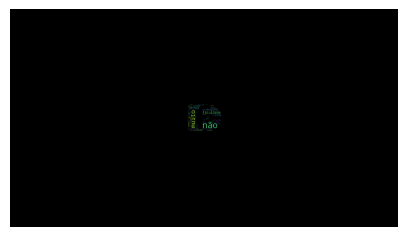

In [12]:
facom_mask = np.array(Image.open("facom.jpg"))

wordcloud = WordCloud(max_words=100,width = 5000,height = 5000,max_font_size=200,
                      background_color="black",mask = facom_mask, stopwords=new_stopwords).generate(text)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("worditout_facom.png")

In [ ]:
os professores não se esforçam em sua maioria para levar em conta a vida dos alunos

em certas disciplinas devido a alguns docentes que não seguem as normas da graduação

Você já sabe que não vai ser aprovado - O professor disse;

 na minha opinião quem marcar 1 nessa questão
 anterior ou é mentiroso ou está sofrendo tanto que não consegue mais visualizar sua própria realidade;

Tem muitos professores que propositalmente usam seu poder para fazer o aluno sofrer; fazendo atividades de nível superior; usando linguagem pejorativa e 
 depreciativa (já ouvi que "você tem que ser burro"; se não entende a matéria ou "você é muito chata" se faz alguma pergunta) e como mulher teve vezes que
 senti que recebia tratamento diferente dos demais alunos;

a faculdade me obriga a aprender em um molde que não condiz com minha forma de aprendizado

 Ingressei no curso de Ciência da Computação em 2015; sofri muito pressão
 e descaso; saí do curso em 2018 e retornei ao curso de Sistemas de Informação em 2021;

porém existem professores que são muito ruins e que tem descaso pelos alunos ou parece que só quer "ferrar" todo mundo;